In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Importar a base de dados 
df=pd.read_csv(r'Bike_Sharing.csv')

In [15]:
# Visualizar os dados
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [11]:
# Verificar os formatos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
# Análise descritiva
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.00,211.17,1.00,183.50,366.00,548.50,731.00
season,731.0,2.50,1.11,1.00,2.00,3.00,3.00,4.00
yr,731.0,0.50,0.50,0.00,0.00,1.00,1.00,1.00
mnth,731.0,6.52,3.45,1.00,4.00,7.00,10.00,12.00
holiday,731.0,0.03,0.17,0.00,0.00,0.00,0.00,1.00
weekday,731.0,3.00,2.00,0.00,1.00,3.00,5.00,6.00
workingday,731.0,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weathersit,731.0,1.40,0.54,1.00,1.00,1.00,2.00,3.00
temp,731.0,0.50,0.18,0.06,0.34,0.50,0.66,0.86
atemp,731.0,0.47,0.16,0.08,0.34,0.49,0.61,0.84


In [18]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
df['season']= df['season'].astype(str)
df['yr']= df['yr'].astype(str)
df['holiday']= df['holiday'].astype(str)
df['weekday']= df['weekday'].astype(str)
df['workingday']= df['workingday'].astype(str)
df['weathersit']= df['weathersit'].astype(str)
df['mnth']= df['mnth'].astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    object 
 4   mnth        731 non-null    object 
 5   holiday     731 non-null    object 
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    object 
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.5+ KB


In [20]:
df.describe().round(2)

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [21]:
# modificando os nomes das colunas
df.columns = ['ID', 'data', 'estacao','ano','mes', 'feriado','dia_semana','dia_util','clima', 'temperatura','sensacao_termica',
             'umidade','vel_vento','casual', 'registrada', 'total']

In [22]:
# Verificar os nomes das variáveis
# informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                731 non-null    int64  
 1   data              731 non-null    object 
 2   estacao           731 non-null    object 
 3   ano               731 non-null    object 
 4   mes               731 non-null    object 
 5   feriado           731 non-null    object 
 6   dia_semana        731 non-null    object 
 7   dia_util          731 non-null    object 
 8   clima             731 non-null    object 
 9   temperatura       731 non-null    float64
 10  sensacao_termica  731 non-null    float64
 11  umidade           731 non-null    float64
 12  vel_vento         731 non-null    float64
 13  casual            731 non-null    int64  
 14  registrada        731 non-null    int64  
 15  total             731 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory us

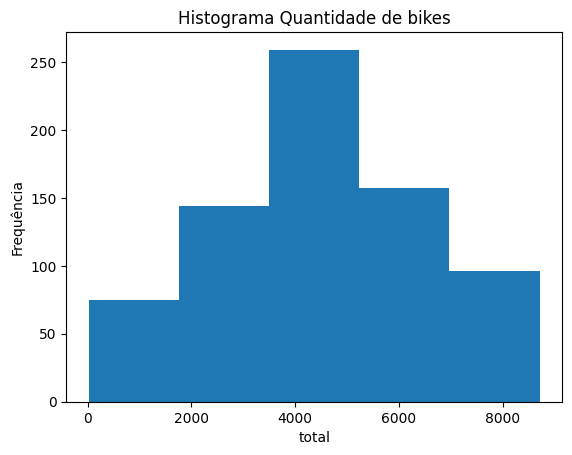

In [25]:
# Histograma da Variável target / Variável Dependente / Supervisionar

plt.hist(df['total'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('total')
plt.title('Histograma Quantidade de bikes');

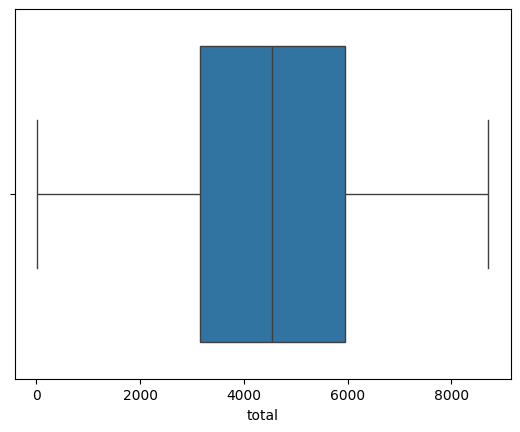

In [26]:
sns.boxplot(x='total', data=df);

In [27]:
# Selecionar as variáveis quantitativas
var_num = ['temperatura','sensacao_termica','umidade','vel_vento', 'total']

In [28]:
# Selecionar as variáveis qualitativas
var_cat =['estacao','ano','mes', 'feriado','dia_semana','dia_util','clima']

In [29]:
# Análise descritiva: medidas resumo
df[var_num].describe().round(2)

,temperatura,sensacao_termica,umidade,vel_vento,total
count,731.00,731.00,731.00,731.00,731.00
mean,0.50,0.47,0.63,0.19,4504.35
std,0.18,0.16,0.14,0.08,1937.21
min,0.06,0.08,0.00,0.02,22.00
25%,0.34,0.34,0.52,0.13,3152.00
50%,0.50,0.49,0.63,0.18,4548.00
75%,0.66,0.61,0.73,0.23,5956.00
max,0.86,0.84,0.97,0.51,8714.00


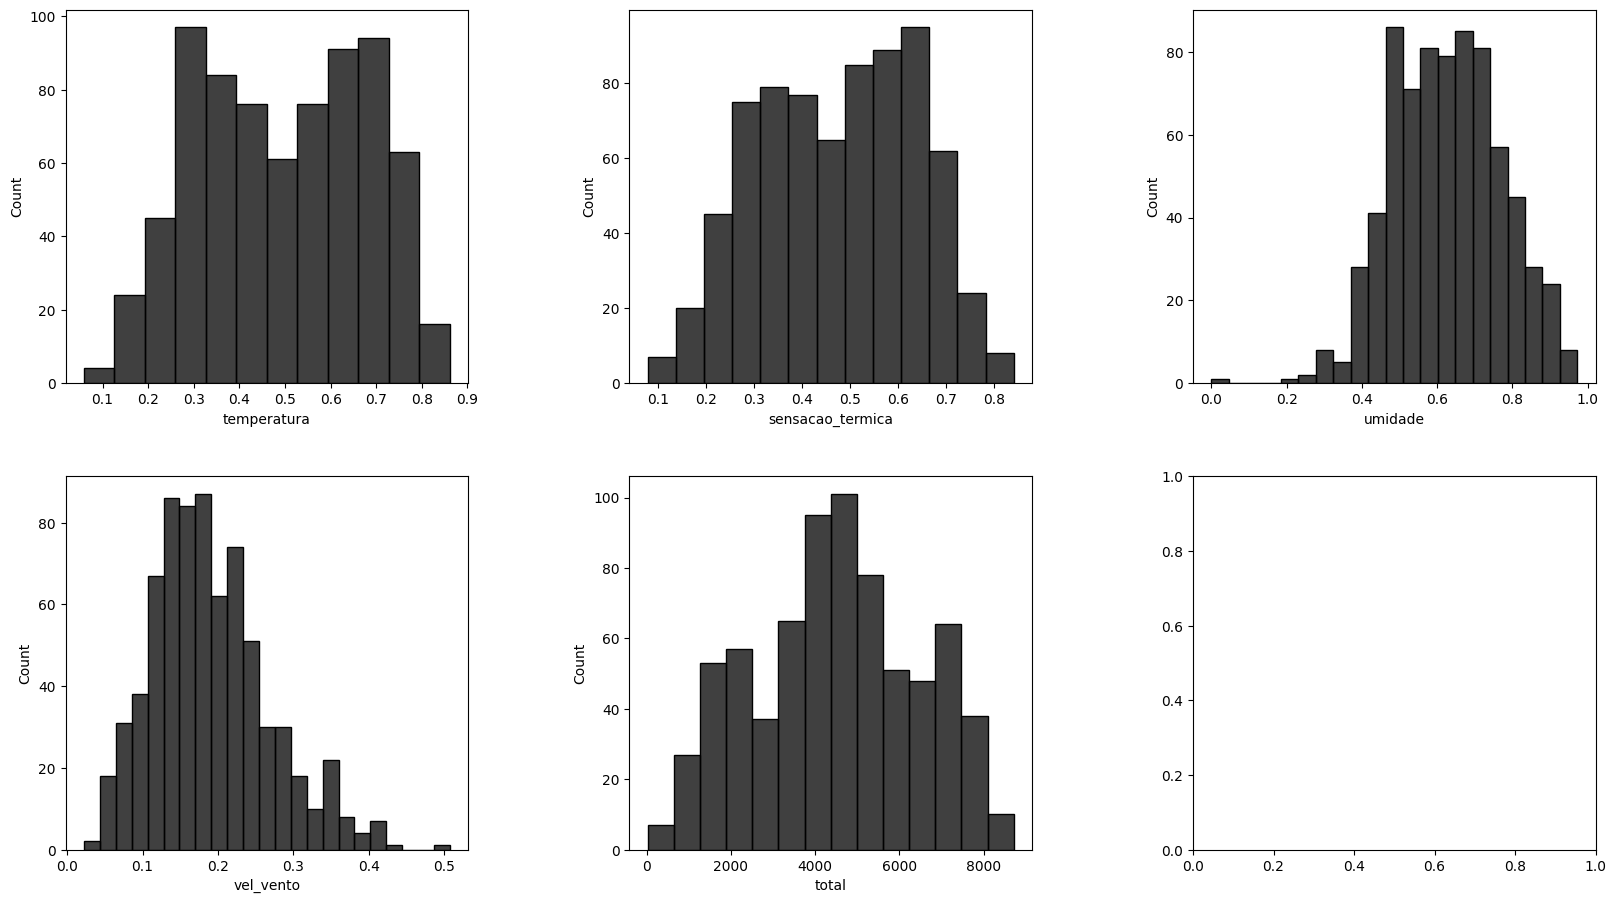

In [35]:
# Análise exploratória dos dados usando o gráfico histograma
# Análise exploratória dos dados
features = var_num
fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.histplot(x, ax=ax, color="black", kde=False)
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4);

Text(0, 0.5, 'vel_vento')

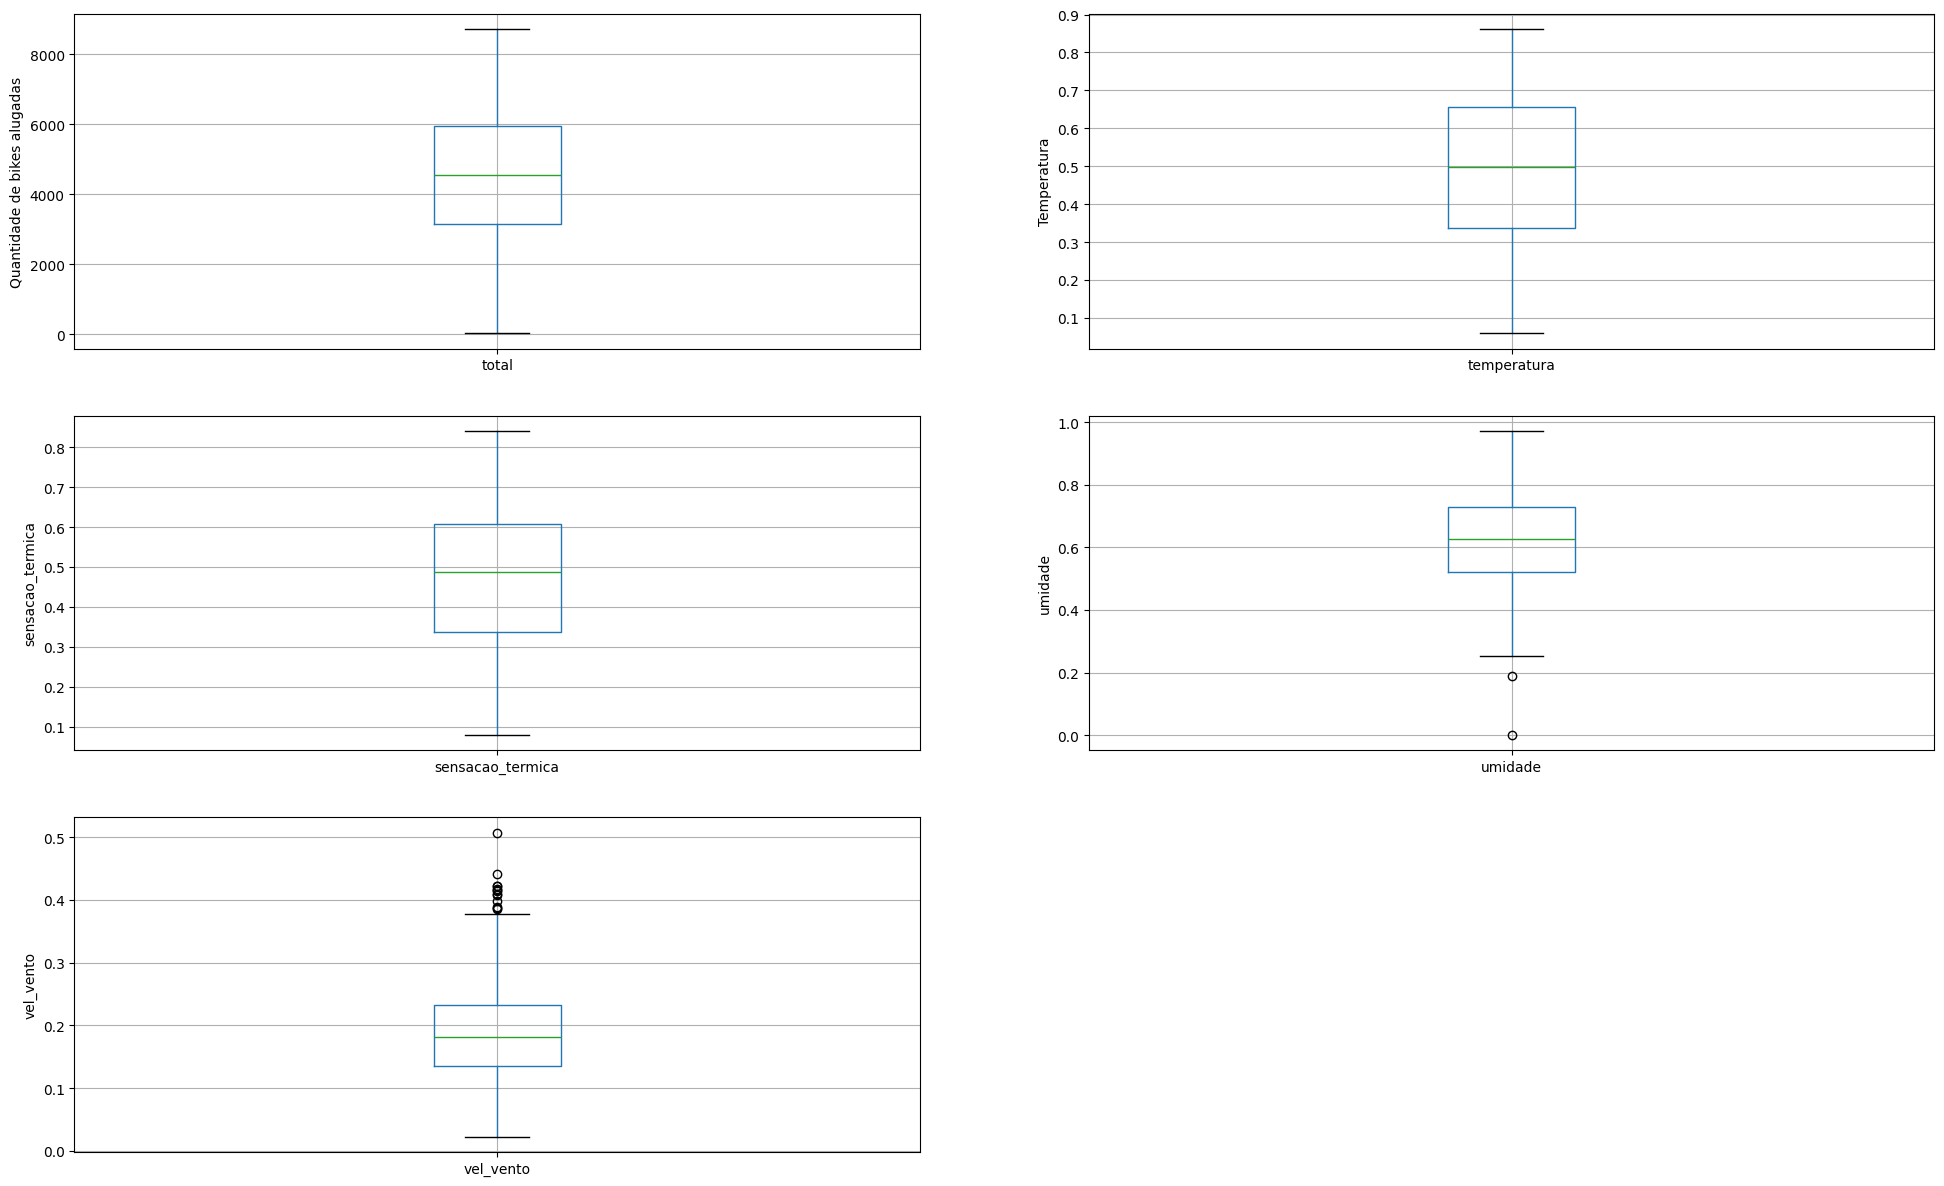

In [36]:
# Análise exploratória dos dados usando o gráfico Box Plot
# Análise exploratória dos dados
plt.figure(figsize=(24,20))

features = var_num
plt.subplot(4, 2, 1)
fig = df.boxplot(column='total')
fig.set_title('')
fig.set_ylabel('Quantidade de bikes alugadas')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='temperatura')
fig.set_title('')
fig.set_ylabel('Temperatura')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='sensacao_termica')
fig.set_title('')
fig.set_ylabel('sensacao_termica')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='umidade')
fig.set_title('')
fig.set_ylabel('umidade')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='vel_vento')
fig.set_title('')
fig.set_ylabel('vel_vento')   

# Técnicas Supervisionadas com variável target quantitativa

Alguns exemplos de Algoritmos:
Regressão Linear, **Árvore de Regressão**, RandomForest, XGBoost, KNN, SVM, NaiveBayes, entre outros

In [38]:
# excluindo as colunas que não precisaremos mais

df1  = df.copy()

df1= df1.drop(['ID', 'data','ano','mes', 'feriado', 'dia_util','estacao', 'dia_semana','clima', 
                       'casual', 'registrada'], axis=1)

In [39]:
# Selecionar as variáveis preditoras e a resposta do modelo

X = df1.drop(['total'], axis=1)
y = df1['total']

In [40]:
# Importar as bibliotecas

from sklearn.model_selection import train_test_split

In [41]:
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 17)

In [42]:
X_train

,temperatura,sensacao_termica,umidade,vel_vento
314,0.324167,0.306817,0.446250,0.314675
384,0.217500,0.220958,0.450000,0.202750
434,0.287500,0.277767,0.350417,0.225750
339,0.462500,0.456400,0.949583,0.232583
612,0.725833,0.686888,0.755000,0.236321
...,...,...,...,...
406,0.224167,0.210867,0.731250,0.289796
390,0.341667,0.356050,0.769583,0.073396
143,0.660000,0.604813,0.740833,0.207092
241,0.639167,0.594704,0.548333,0.125008


# Árvore de Regressão

![image.png](./image.png)

In [43]:
# Import the necessary modules and libraries

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [44]:
# Fit regression model
model = DecisionTreeRegressor(max_depth=4,min_samples_split=50,random_state=17,criterion='squared_error')

In [45]:
cols = X_train.columns

In [46]:
cols

Index(['temperatura', 'sensacao_termica', 'umidade', 'vel_vento'], dtype='object')

In [47]:
# Treinando o modelo de arvore de decisão:

model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=50, random_state=17)

[Text(0.5119047619047619, 0.9, 'temperatura <= 0.464\nsquared_error = 3716636.365\nsamples = 511\nvalue = 4419.804'),
 Text(0.2619047619047619, 0.7, 'sensacao_termica <= 0.261\nsquared_error = 2515986.052\nsamples = 249\nvalue = 3170.888'),
 Text(0.14285714285714285, 0.5, 'temperatura <= 0.255\nsquared_error = 692452.924\nsamples = 66\nvalue = 1810.348'),
 Text(0.09523809523809523, 0.3, 'umidade <= 0.529\nsquared_error = 446617.156\nsamples = 51\nvalue = 1623.686'),
 Text(0.047619047619047616, 0.1, 'squared_error = 462177.487\nsamples = 26\nvalue = 1840.885'),
 Text(0.14285714285714285, 0.1, 'squared_error = 330347.68\nsamples = 25\nvalue = 1397.8'),
 Text(0.19047619047619047, 0.3, 'squared_error = 1007046.533\nsamples = 15\nvalue = 2445.0'),
 Text(0.38095238095238093, 0.5, 'umidade <= 0.696\nsquared_error = 2265282.999\nsamples = 183\nvalue = 3661.574'),
 Text(0.2857142857142857, 0.3, 'temperatura <= 0.342\nsquared_error = 2001133.172\nsamples = 123\nvalue = 4047.236'),
 Text(0.238095

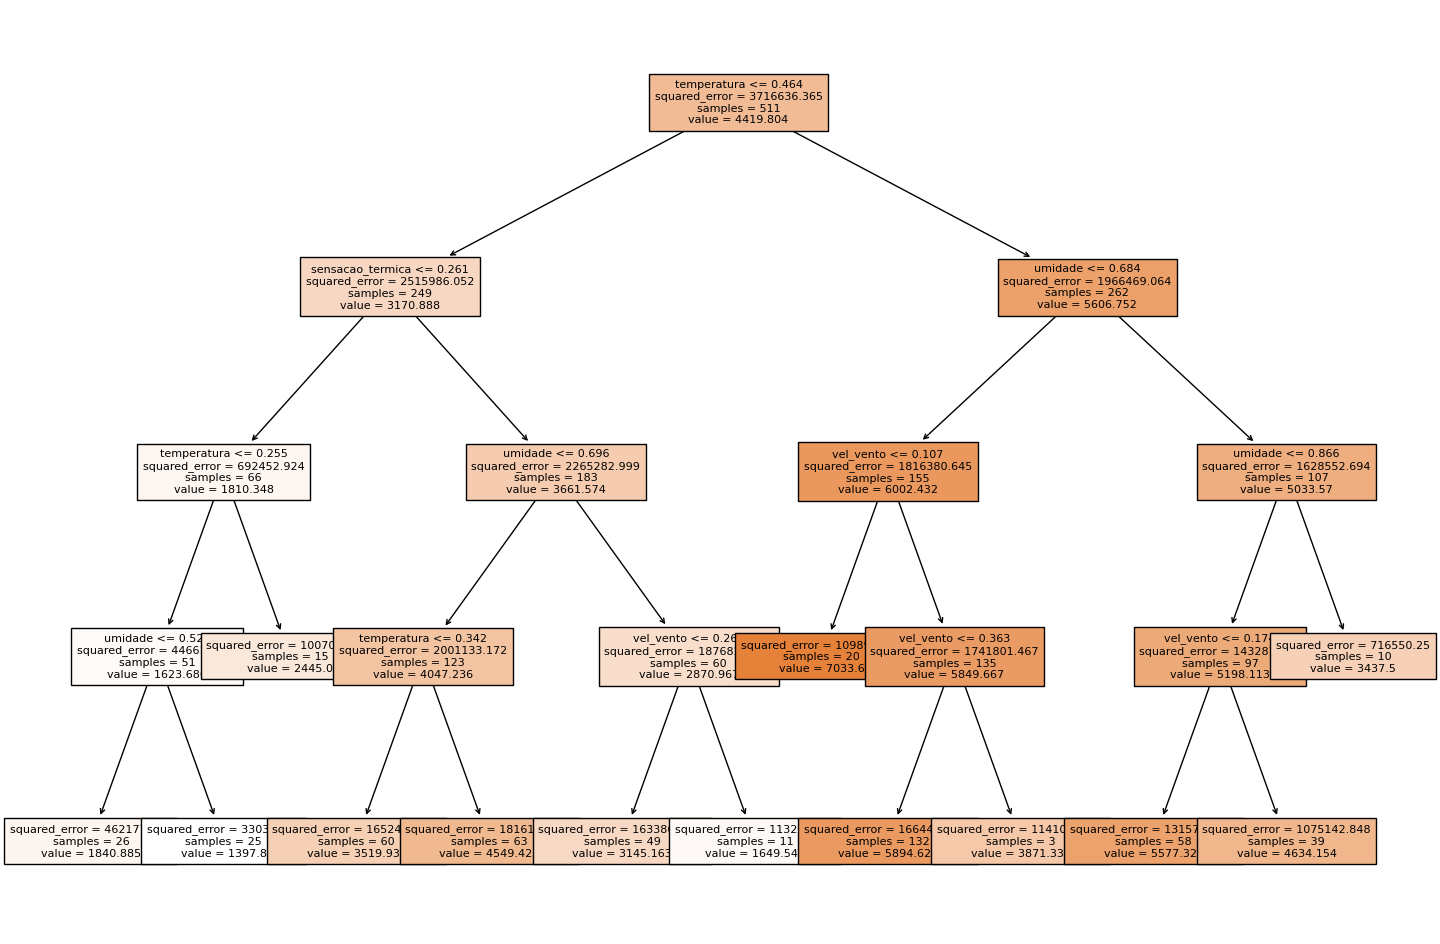

In [48]:
input_features=['temperatura', 'sensacao_termica', 'umidade', 'vel_vento', 'estacao_2',
       'estacao_3', 'estacao_4', 'ano_1', 'mes_10', 'mes_11', 'mes_12',
       'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9',
       'feriado_1', 'dia_semana_1', 'dia_semana_2', 'dia_semana_3',
       'dia_semana_4', 'dia_semana_5', 'dia_semana_6', 'dia_util_1', 'clima_2',
       'clima_3']
fig = plt.figure(figsize=(18,12))
plot_tree(model, fontsize=8,filled=True, feature_names=input_features )

In [49]:
for caracteristica, score in zip(X_train, model.feature_importances_):
  print('caracteristica {} e Importância {}'.format(caracteristica, score*100))

caracteristica temperatura e Importância 67.20745318788568
caracteristica sensacao_termica e Importância 14.001852027276104
caracteristica umidade e Importância 12.28267535654324
caracteristica vel_vento e Importância 6.508019428294973


In [50]:
# Aplicando o algoritmo na base teste

y_test_regtree  = model.predict(X_test)

In [51]:
y_test_regtree

array([4634.15384615, 3145.16326531, 5894.62878788, 4549.42857143,
       4549.42857143, 3519.93333333, 5577.32758621, 5577.32758621,
       5577.32758621, 5894.62878788, 3145.16326531, 3519.93333333,
       1397.8       , 1397.8       , 3145.16326531, 7033.6       ,
       3437.5       , 5894.62878788, 5894.62878788, 2445.        ,
       5894.62878788, 3437.5       , 4549.42857143, 3519.93333333,
       4634.15384615, 3437.5       , 5894.62878788, 3145.16326531,
       5894.62878788, 5894.62878788, 5894.62878788, 3145.16326531,
       7033.6       , 5577.32758621, 5894.62878788, 5894.62878788,
       1840.88461538, 1649.54545455, 4549.42857143, 3437.5       ,
       4634.15384615, 1397.8       , 3519.93333333, 4634.15384615,
       3437.5       , 7033.6       , 5894.62878788, 5577.32758621,
       5577.32758621, 4634.15384615, 4549.42857143, 5894.62878788,
       5894.62878788, 5894.62878788, 7033.6       , 4549.42857143,
       1397.8       , 3519.93333333, 5894.62878788, 5894.62878